In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
gh = pd.read_csv("C:/download files/AutoData.csv")
gh.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
gh.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
gh.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [5]:
for i  in gh.columns:
    print(i)
    print(gh[i].unique())

symboling
[ 3  1  2  0 -1 -2]
make
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'


# EDA

In [6]:
gh['make'].unique() # it has both brand name and model name

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [7]:
# seprating make name and model from data
n= gh["make"].str.split(" ",n = 1, expand = True)
n.head(2)

,0,1
0,alfa-romero,giulia
1,alfa-romero,stelvio


In [8]:
#gh["model"].unique()

gh["make"]=n[0].str.upper()
gh["model"]=n[1]
gh["make"].unique()


array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAXDA', 'MAZDA', 'BUICK', 'MERCURY',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE',
       'PORCSHCE', 'RENAULT', 'SAAB', 'SUBARU', 'TOYOTA', 'TOYOUTA',
       'VOKSWAGEN', 'VOLKSWAGEN', 'VW', 'VOLVO'], dtype=object)

In [9]:
gh["model"].value_counts()
gh.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,model
0,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,giulia
1,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,stelvio
2,1,ALFA-ROMERO,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Quadrifoglio
3,2,AUDI,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,100 ls
4,2,AUDI,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,100ls


In [10]:
#maker is seperated 
df = gh.drop(["model"],axis=1)
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,ALFA-ROMERO,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,AUDI,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,AUDI,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# data cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

# ploting Graphs

In [12]:
df["make"].unique()
df["make"]= df["make"].replace(to_replace='TOYOUTA',value='TOYOTA')
df["make"]= df["make"].replace(to_replace='VOKSWAGEN',value='VOLKSWAGEN')
#volkswagen
df["make"].unique()

array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAXDA', 'MAZDA', 'BUICK', 'MERCURY',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE',
       'PORCSHCE', 'RENAULT', 'SAAB', 'SUBARU', 'TOYOTA', 'VOLKSWAGEN',
       'VW', 'VOLVO'], dtype=object)

In [13]:
make = df["make"].value_counts().reset_index()
make.head()

,index,make
0,TOYOTA,32
1,NISSAN,18
2,MAZDA,15
3,MITSUBISHI,13
4,HONDA,13


In [14]:
make.head()

,index,make
0,TOYOTA,32
1,NISSAN,18
2,MAZDA,15
3,MITSUBISHI,13
4,HONDA,13


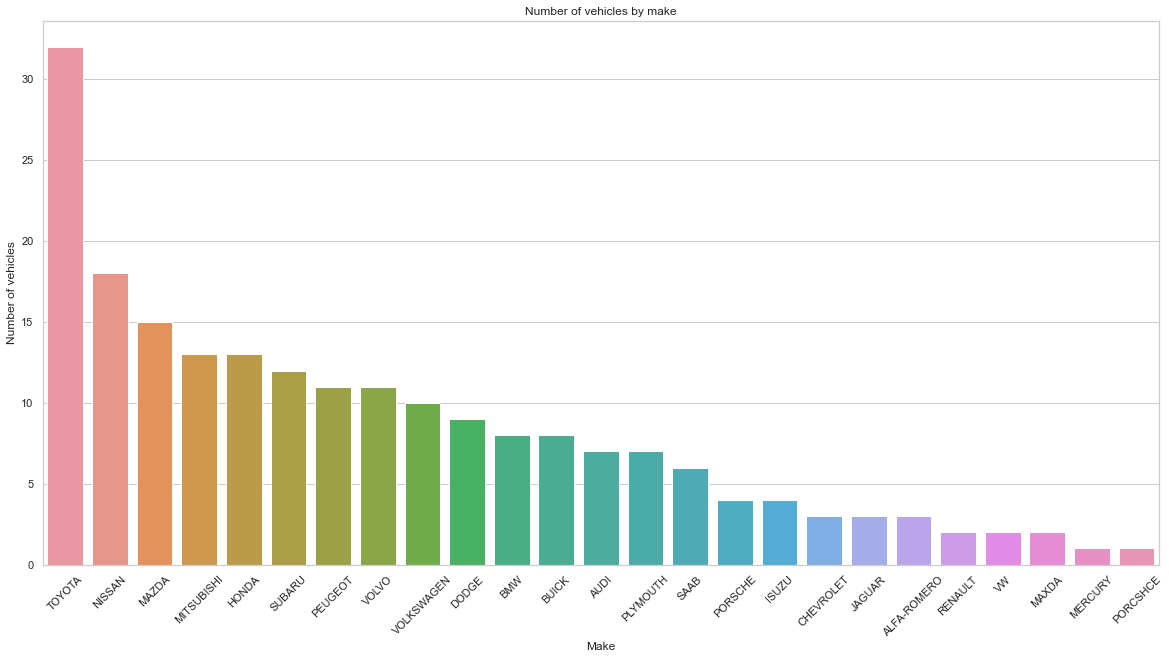

In [15]:
plt.figure(figsize=[20,10])
sns.set(style="whitegrid")
chart=sns.barplot("index","make",data = make)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

# --->1 symboling: -3, -2, -1, 0, 1, 2, 3

[(-3.0, 3.0)]

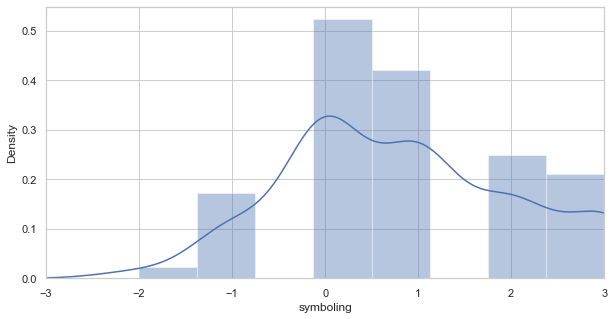

In [16]:
plt.figure(figsize=[10,5])

sns.distplot(df["symboling"]).set(xlim=(-3,3))

# ---> 3. fuel-type: diesel, gas.


<AxesSubplot:xlabel='fueltype', ylabel='count'>

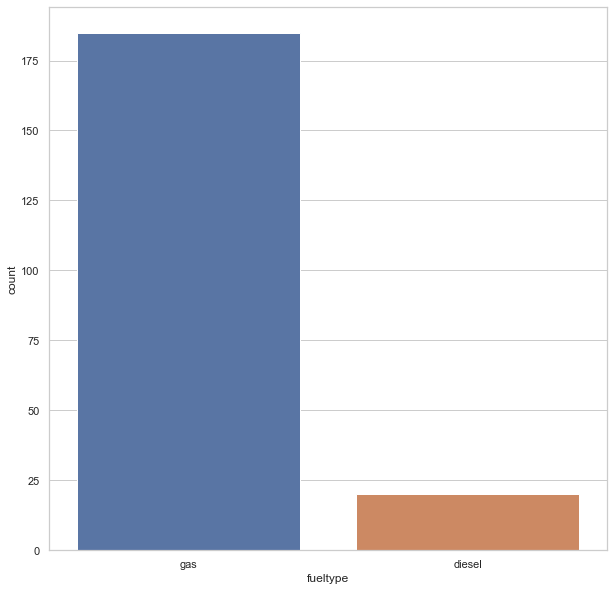

In [17]:

plt.figure(figsize=[10,10])
sns.countplot(df["fueltype"])

# ---> 4. aspiration: std, turbo

<AxesSubplot:xlabel='aspiration', ylabel='count'>

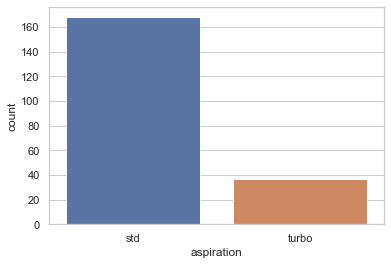

In [18]:
sns.countplot(df["aspiration"])

# ---> 5. num-of-doors: four, two.

<AxesSubplot:xlabel='doornumber', ylabel='count'>

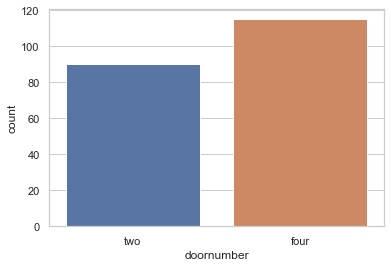

In [19]:
sns.countplot(df["doornumber"])

# ---> 6. body-style: hardtop, wagon, sedan, hatchback, convertible.

<AxesSubplot:xlabel='carbody', ylabel='count'>

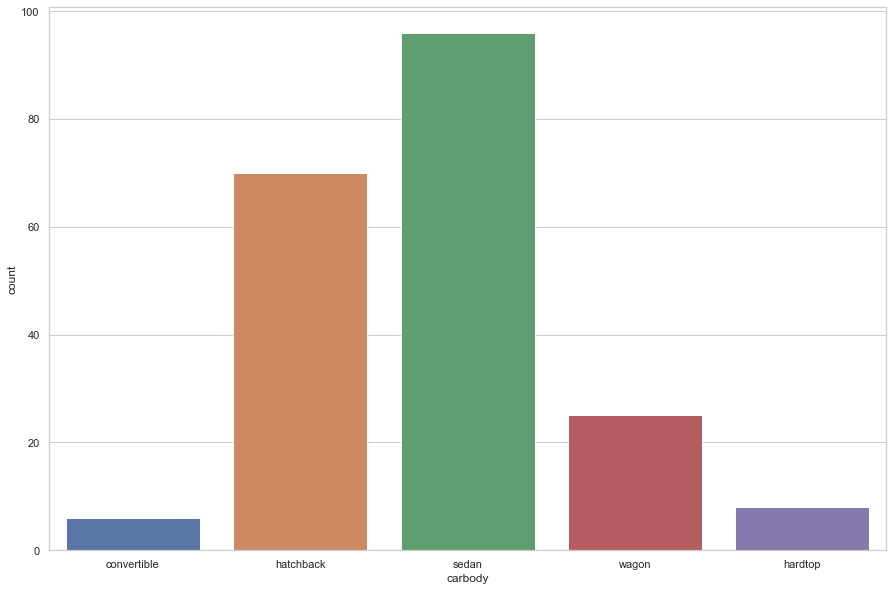

In [20]:
plt.figure(figsize=[15,10])

sns.countplot(df["carbody"])

# ---> 7. drive-wheels: 4wd, fwd, rwd.


<AxesSubplot:xlabel='drivewheel', ylabel='count'>

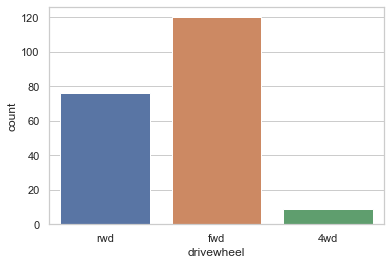

In [21]:
sns.countplot(df["drivewheel"])

# --> 8. engine-location: front, rear.

<AxesSubplot:xlabel='enginelocation', ylabel='count'>

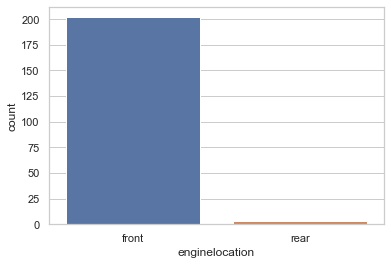

In [22]:
sns.countplot(df["enginelocation"])

# ---> 9. wheel-base: continuous from 86.6 120.9.

<AxesSubplot:xlabel='wheelbase', ylabel='Density'>

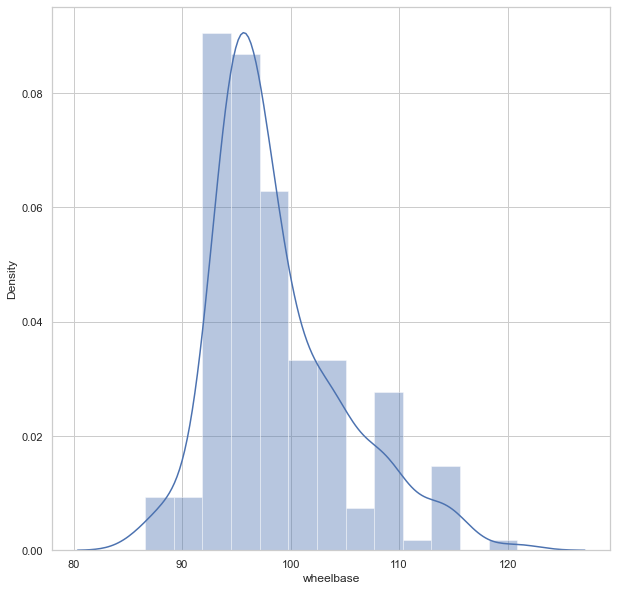

In [23]:
plt.figure(figsize=[10,10])

sns.distplot(df["wheelbase"])

# ---> 10. length: continuous from 141.1 to 208.1. 11 

<AxesSubplot:xlabel='carlength', ylabel='Density'>

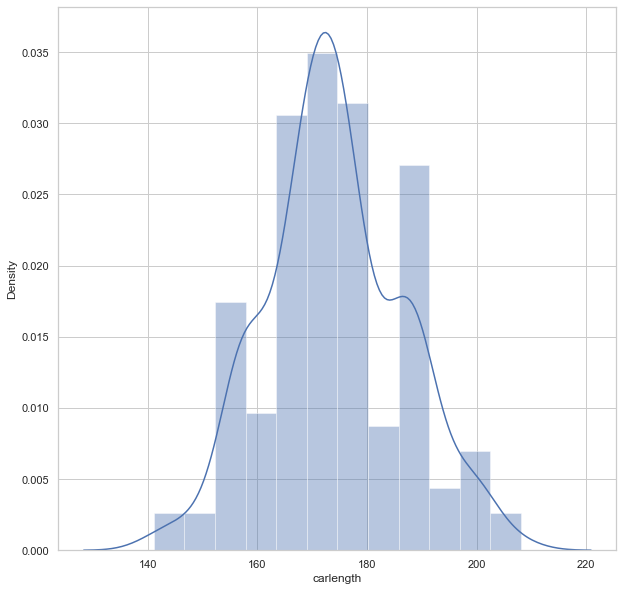

In [24]:
plt.figure(figsize=[10,10])

sns.distplot(df["carlength"])

# ---> width: continuous from 60.3 to 72.3.

<AxesSubplot:xlabel='carwidth', ylabel='Density'>

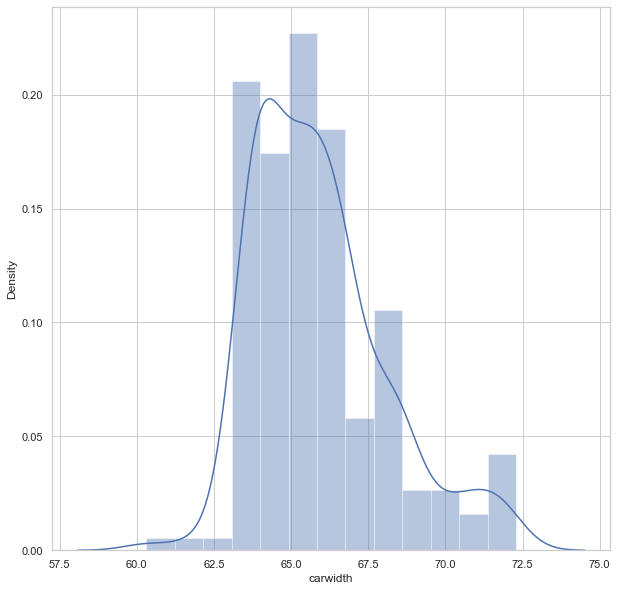

In [25]:
plt.figure(figsize=[10,10])

sns.distplot(df["carwidth"])

# ---> 12. height: continuous from 47.8 to 59.8.

<AxesSubplot:xlabel='carheight', ylabel='Density'>

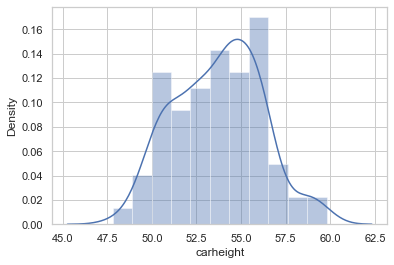

In [26]:
sns.distplot(df["carheight"])

# ---> 13. curb-weight: continuous from 1488 to 4066.

<AxesSubplot:xlabel='curbweight', ylabel='Density'>

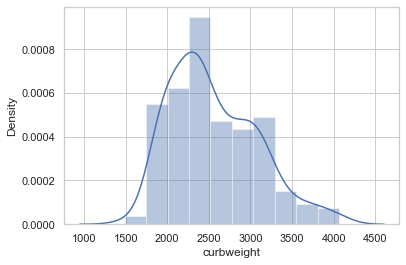

In [27]:
sns.distplot(df["curbweight"])

# ---> 14. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.

<AxesSubplot:xlabel='enginetype', ylabel='count'>

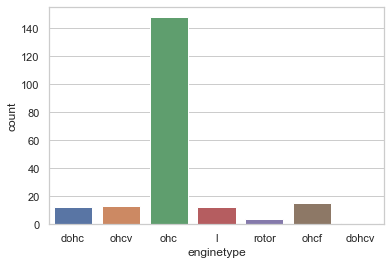

In [28]:
sns.countplot(df["enginetype"])

# ---> 15. num-of-cylinders: eight, five, four, six, three, twelve, two.


<AxesSubplot:xlabel='cylindernumber', ylabel='count'>

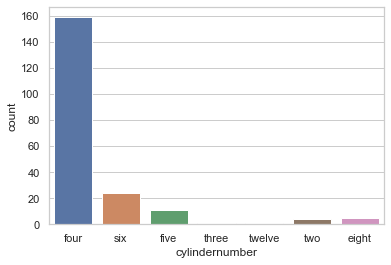

In [29]:
sns.countplot(df["cylindernumber"])

# ---> 16. engine-size: continuous from 61 to 326.


<AxesSubplot:xlabel='enginesize', ylabel='Density'>

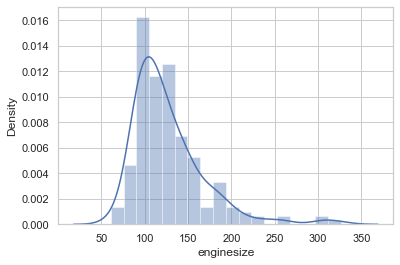

In [30]:
sns.distplot(df["enginesize"])

# ---> 17. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.

<AxesSubplot:xlabel='fuelsystem', ylabel='count'>

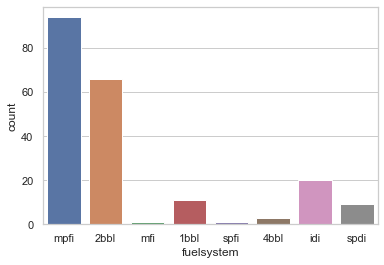

In [31]:
sns.countplot(df["fuelsystem"])

# ---> 18. bore: continuous from 2.54 to 3.94.


<AxesSubplot:xlabel='boreratio', ylabel='Density'>

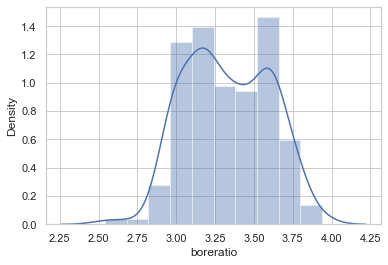

In [32]:
sns.distplot(df["boreratio"])

# ---> 19. stroke: continuous from 2.07 to 4.17.

<AxesSubplot:xlabel='stroke', ylabel='Density'>

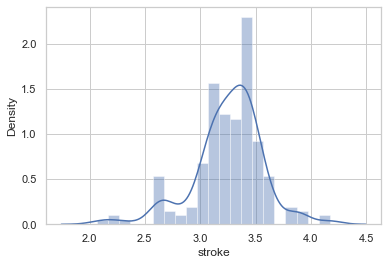

In [33]:
sns.distplot(df["stroke"])

# ---> 20. compression-ratio: continuous from 7 to 23.

<AxesSubplot:xlabel='compressionratio', ylabel='Density'>

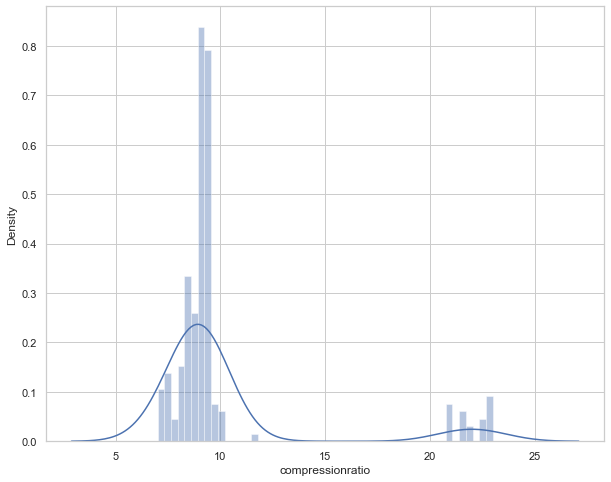

In [34]:
plt.figure(figsize=[10,8])

sns.distplot(df["compressionratio"])

# ---> 21. horsepower: continuous from 48 to 288.

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

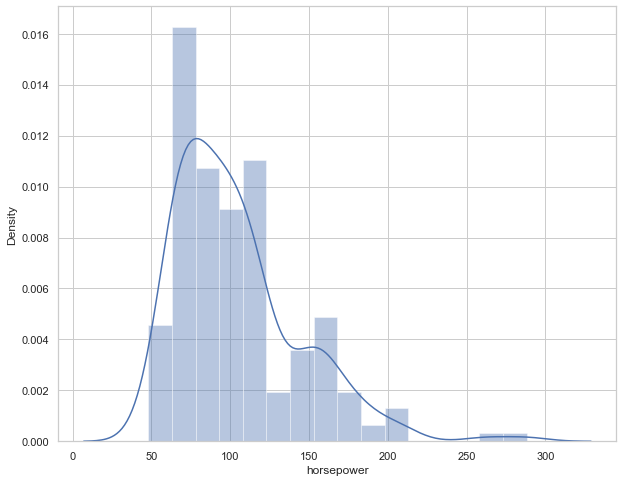

In [35]:
plt.figure(figsize=[10,8])

sns.distplot(df["horsepower"])

# ---> 22. peak-rpm: continuous from 4150 to 6600.

<AxesSubplot:xlabel='peakrpm', ylabel='Density'>

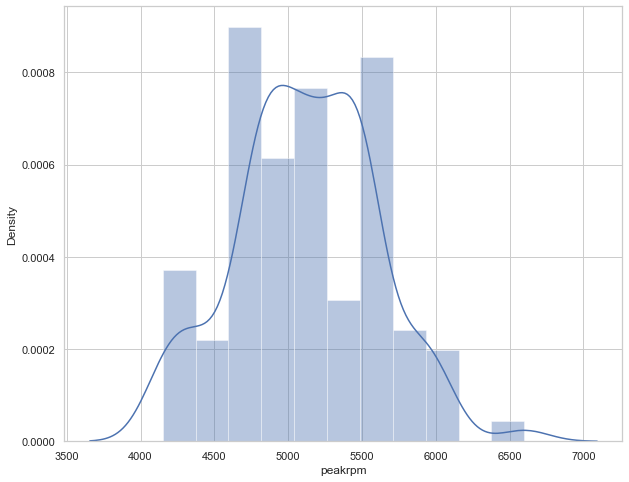

In [36]:
plt.figure(figsize=[10,8])

sns.distplot(df["peakrpm"])

# ---> 23. city-mpg: continuous from 13 to 49.

<AxesSubplot:xlabel='citympg', ylabel='Density'>

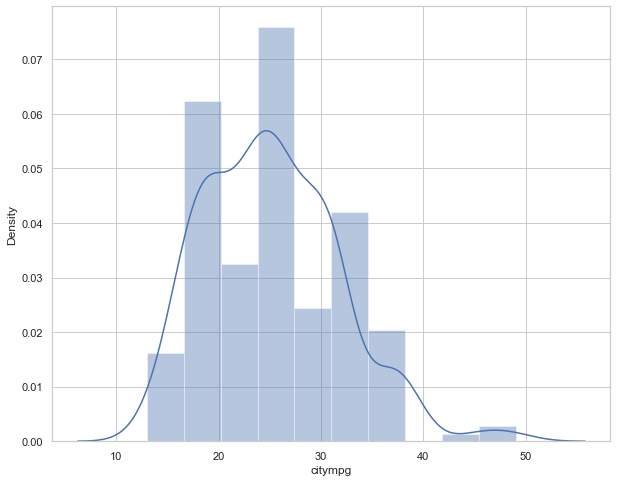

In [37]:
plt.figure(figsize=[10,8])

sns.distplot(df["citympg"])

# ---> 24. highway-mpg: continuous from 16 to 54.

<AxesSubplot:xlabel='highwaympg', ylabel='Density'>

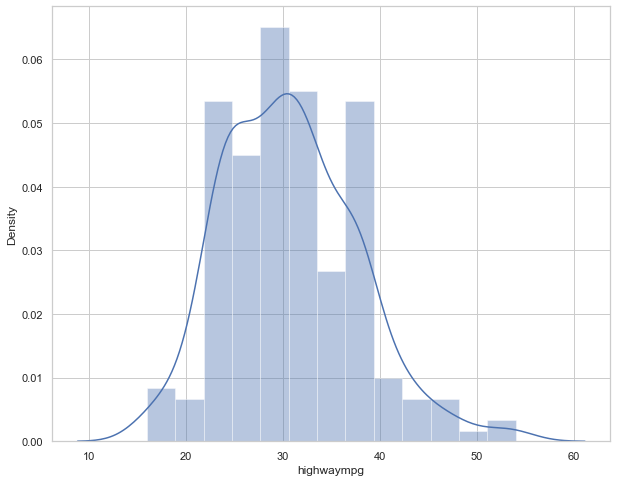

In [38]:
plt.figure(figsize=[10,8])

sns.distplot(df["highwaympg"])

# ---> 25. price: continuous from 5118 to 45400.

<AxesSubplot:xlabel='price', ylabel='Density'>

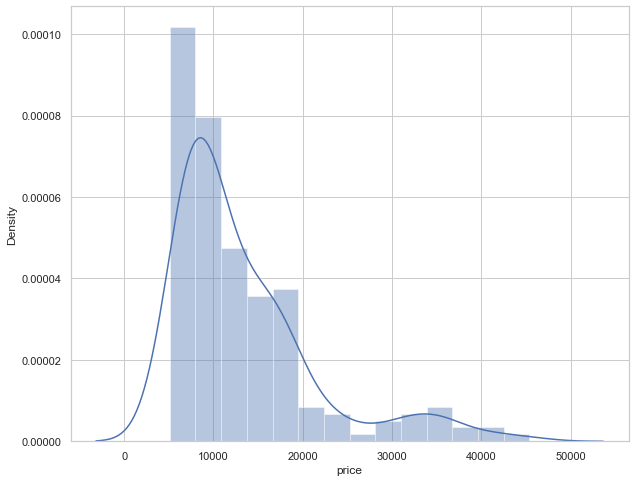

In [39]:
plt.figure(figsize=[10,8])

sns.distplot(df["price"])

---> Findings We have taken some key features of the automobile dataset for this analysis and below are our findings. 1.Toyota is the make of the car which has most number of vehicles with more than 40% than the 2nd highest Nissan 2.Most preferred fuel type for the customer is standard vs trubo having more than 80% of the choice 3.For drive wheels, front wheel drive has most number of cars followed by rear wheel and four wheel. There are very less number of cars for four wheel drive. 4.Curb weight of the cars are distributed between 1500 and 4000 approximately 5.Symboling or the insurance risk rating have the ratings between -3 and 3 however for our dataset it starts from -2. There are more cars in the range of 0 and 1. 6.Normalized losses which is the average loss payment per insured vehicle year is has more number of cars in the range between 65 and 150.

# Train test split

In [40]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [41]:
df.head(3)

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,ALFA-ROMERO,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


# --->  Pick the best variable for making a simple linear regression model

In [42]:
# create training and testing vars
y = df[["price"]]
X = df[["enginesize"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40, random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(123, 1) (123, 1)
(82, 1) (82, 1)


In [43]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [44]:
preds = model.predict(X_test)

# ---> Build model using best variable and report the R2

In [45]:
from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_test,preds))

R2 score : 0.75


In [46]:
#curbweight
y = df[["price"]]
X = df[["curbweight"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40, random_state=100)

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_test,preds))

R2 score : 0.58


In [47]:
#horsepower

y = df[["price"]]
X = df[["horsepower"]]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40, random_state=100)

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
preds = model.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_test,preds))

R2 score : 0.68


# Best model based on SLR Method:
From analysis, Engine size attribute mostly predicts the price at high r2 value